<a href="https://colab.research.google.com/github/bebeam2942/Final_dataviz/blob/main/visualization_final_exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
from datetime import datetime as dt
from datetime import time
from matplotlib import pyplot as plt

# Cleaning Data

### ข้อมูล Covid

In [29]:
covid = pd.read_csv('/content/drive/MyDrive/dataviz_2021_data/covid19cases (2).csv')
covid

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset
0,1,12/1/2020,NaN,หญิง,61.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
1,2,17/1/2020,NaN,หญิง,74.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
2,3,22/1/2020,NaN,หญิง,73.0,ปี,Thailand,นครปฐม,คนต่างชาติเดินทางมาจากต่างประเทศ,นครปฐม,เมือง
3,4,22/1/2020,NaN,ชาย,68.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
4,5,24/1/2020,NaN,หญิง,66.0,ปี,China,นนทบุรี,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
...,...,...,...,...,...,...,...,...,...,...,...
57505,57506,26/4/2021,25/4/2021,ชาย,51.0,ปี,Thailand,กรุงเทพมหานคร,อื่นๆ,NaN,NaN
57506,57507,26/4/2021,25/4/2021,ชาย,50.0,ปี,Thailand,กรุงเทพมหานคร,อื่นๆ,NaN,NaN
57507,57508,26/4/2021,25/4/2021,ชาย,24.0,ปี,Thailand,กรุงเทพมหานคร,อื่นๆ,NaN,NaN
57508,57509,26/4/2021,25/4/2021,ชาย,24.0,ปี,Thailand,กรุงเทพมหานคร,อื่นๆ,NaN,NaN


In [30]:
covid.isnull().any() #ดูว่าcolumnไหนมีmissingบ้าง 

No.                      False
announce_date            False
Notified date             True
sex                       True
age                       True
Unit                      True
nationality               True
province_of_isolation     True
risk                      True
province_of_onset         True
district_of_onset         True
dtype: bool

In [31]:
#แก้ไขข้อมูลที่จำเป็น โดยทำการจัดกลุ่มให้เป็นกลุ่มที่ชื่อว่า ไม่ปรากฎ
covid["province_of_isolation"].fillna("ไม่ปรากฎ", inplace = True)
covid["province_of_onset"].fillna("ไม่ปรากฎ", inplace = True)
covid["district_of_onset"].fillna("ไม่ปรากฎ", inplace = True)

#และจะ Drop Column "Notified date" ออก
covid.drop(columns=['Notified date'],inplace=True)


In [75]:
covid

,No.,announce_date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset
0,1,2020-01-12,หญิง,61.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,ไม่ปรากฎ
1,2,2020-01-17,หญิง,74.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,ไม่ปรากฎ
2,3,2020-01-22,หญิง,73.0,ปี,Thailand,นครปฐม,คนต่างชาติเดินทางมาจากต่างประเทศ,นครปฐม,เมือง
3,4,2020-01-22,ชาย,68.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,ไม่ปรากฎ
4,5,2020-01-24,หญิง,66.0,ปี,China,นนทบุรี,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,ไม่ปรากฎ
...,...,...,...,...,...,...,...,...,...,...
57505,57506,2021-04-26,ชาย,51.0,ปี,Thailand,กรุงเทพมหานคร,อื่นๆ,ไม่ปรากฎ,ไม่ปรากฎ
57506,57507,2021-04-26,ชาย,50.0,ปี,Thailand,กรุงเทพมหานคร,อื่นๆ,ไม่ปรากฎ,ไม่ปรากฎ
57507,57508,2021-04-26,ชาย,24.0,ปี,Thailand,กรุงเทพมหานคร,อื่นๆ,ไม่ปรากฎ,ไม่ปรากฎ
57508,57509,2021-04-26,ชาย,24.0,ปี,Thailand,กรุงเทพมหานคร,อื่นๆ,ไม่ปรากฎ,ไม่ปรากฎ


# ข้อที่ 1 เปรียบเทียบจำนวนผู้ป่วยกับจำนวนคนเดินทางในแต่ละเดือน

In [76]:
covid['announce_date']  = pd.to_datetime(covid['announce_date'],format='%d/%m/%Y')

### จำนวนผู้ป่วยในแต่ละเดือน

In [77]:
Patient_totals = [covid[(covid['announce_date'].dt.month==1) & (covid['announce_date'].dt.year==2020)].count()[0]
                                ,covid[(covid['announce_date'].dt.month==2) & (covid['announce_date'].dt.year==2020)].count()[0]
                                ,covid[(covid['announce_date'].dt.month==3) & (covid['announce_date'].dt.year==2020)].count()[0]
                                ,covid[(covid['announce_date'].dt.month==4) & (covid['announce_date'].dt.year==2020)].count()[0]
                                ,covid[(covid['announce_date'].dt.month==5) & (covid['announce_date'].dt.year==2020)].count()[0]
                                ,covid[(covid['announce_date'].dt.month==6) & (covid['announce_date'].dt.year==2020)].count()[0]
                                ,covid[(covid['announce_date'].dt.month==7) & (covid['announce_date'].dt.year==2020)].count()[0]
                                ,covid[(covid['announce_date'].dt.month==8) & (covid['announce_date'].dt.year==2020)].count()[0]
                                ,covid[(covid['announce_date'].dt.month==9) & (covid['announce_date'].dt.year==2020)].count()[0]
                                ,covid[(covid['announce_date'].dt.month==10) & (covid['announce_date'].dt.year==2020)].count()[0]
                               ,covid[(covid['announce_date'].dt.month==11) & (covid['announce_date'].dt.year==2020)].count()[0]
                               ,covid[(covid['announce_date'].dt.month==12) & (covid['announce_date'].dt.year==2020)].count()[0]
                               ,covid[(covid['announce_date'].dt.month==1) & (covid['announce_date'].dt.year==2021)].count()[0]
                               ,covid[(covid['announce_date'].dt.month==2) & (covid['announce_date'].dt.year==2021)].count()[0]
                               ,covid[(covid['announce_date'].dt.month==3) & (covid['announce_date'].dt.year==2021)].count()[0]
                               ,covid[(covid['announce_date'].dt.month==4) & (covid['announce_date'].dt.year==2021)].count()[0]]
Patient_totals

[19,
 23,
 1609,
 1303,
 127,
 90,
 139,
 102,
 152,
 216,
 218,
 2886,
 11898,
 7169,
 2912,
 28647]

### ข้อมูลประชาชนที่เดินทาง

In [35]:
passenger = pd.read_excel("/content/drive/MyDrive/dataviz_2021_data/passenger-covid19.xlsx",sheet_name=3,skiprows=1,skipfooter=33)
passenger

,Unnamed: 0,2020-01-01 00:00:00,2020-01-02 00:00:00,2020-01-03 00:00:00,2020-01-04 00:00:00,2020-01-05 00:00:00,2020-01-06 00:00:00,2020-01-07 00:00:00,2020-01-08 00:00:00,2020-01-09 00:00:00,2020-01-10 00:00:00,2020-01-11 00:00:00,2020-01-12 00:00:00,2020-01-13 00:00:00,2020-01-14 00:00:00,2020-01-15 00:00:00,2020-01-16 00:00:00,2020-01-17 00:00:00,2020-01-18 00:00:00,2020-01-19 00:00:00,2020-01-20 00:00:00,2020-01-21 00:00:00,2020-01-22 00:00:00,2020-01-23 00:00:00,2020-01-24 00:00:00,2020-01-25 00:00:00,2020-01-26 00:00:00,2020-01-27 00:00:00,2020-01-28 00:00:00,2020-01-29 00:00:00,2020-01-30 00:00:00,2020-01-31 00:00:00,2020-02-01 00:00:00,2020-02-02 00:00:00,2020-02-03 00:00:00,2020-02-04 00:00:00,2020-02-05 00:00:00,2020-02-06 00:00:00,2020-02-07 00:00:00,2020-02-08 00:00:00,...,2021-03-18 00:00:00,2021-03-19 00:00:00,2021-03-20 00:00:00,2021-03-21 00:00:00,2021-03-22 00:00:00,2021-03-23 00:00:00,2021-03-24 00:00:00,2021-03-25 00:00:00,2021-03-26 00:00:00,2021-03-27 00:00:00,2021-03-28 00:00:00,2021-03-29 00:00:00,2021-03-30 00:00:00,2021-03-31 00:00:00,2021-04-01 00:00:00,2021-04-02 00:00:00,2021-04-03 00:00:00,2021-04-04 00:00:00,2021-04-05 00:00:00,2021-04-06 00:00:00,2021-04-07 00:00:00,2021-04-08 00:00:00,2021-04-09 00:00:00,2021-04-10 00:00:00,2021-04-11 00:00:00,2021-04-12 00:00:00,2021-04-13 00:00:00,2021-04-14 00:00:00,2021-04-15 00:00:00,2021-04-16 00:00:00,2021-04-17 00:00:00,2021-04-18 00:00:00,2021-04-19 00:00:00,2021-04-20 00:00:00,2021-04-21 00:00:00,2021-04-22 00:00:00,2021-04-23 00:00:00,2021-04-24 00:00:00,2021-04-25 00:00:00,2021-04-26 00:00:00
0,ทางถนน (คน),1483255,1705026,1752572,1576146,1565134,1746239,1730243,1721777,1698594,1727356,1522765,1511236,1683606,1691301,1727613,1676901,1732040,1556750,1511356,1718946,1710079,1678182,1685422,1658692,1523835,1498975,1696898,1679988,1668462,1640721,1704546,1400174,1483074,1706497,1731697,1727513,1662866,1746742,1505635,...,997062,1017447,849673,787616,937505,969454,958065,981683,1011976,877911,794001,974571,965117,967022,987469,1006485,868194,789312,965421,753176,908431,936938,929038,719618,555680,578184,424539,454352,479063,596596,540688,507339,695769,665925,648848,631892,635830,516751,425707,580580
1,ทางราง (คน),885353,1269207,1366412,1027281,915425,1479971,1496915,1496873,1525899,1630428,1192917,988051,1479502,1491002,1502596,1507477,1599647,1169227,983700,1495196,1497279,1488097,1497174,1527329,1116084,938763,1420125,1457240,1440515,1464619,1597290,1097787,940562,1452349,1437693,1463069,1465400,1589959,1036116,...,984873,1033094,690769,544737,961659,986118,994193,1007277,1083825,730040,583999,1002307,1008957,1039196,1037660,1109747,726174,537800,986006,586488,932517,830224,792450,430863,303809,396526,235614,227986,245450,421863,303925,260010,520387,488979,475030,467490,474554,289943,223384,418835
2,ทางน้ำ (คน),272578,291990,301260,271171,254176,281785,275127,253550,263139,280283,243767,246025,276490,276916,253897,252473,281743,251052,227983,293441,278167,267105,266393,281291,257999,246371,269399,270801,253640,257520,264406,220866,231707,264747,259426,262889,257261,268799,234187,...,85762,126155,81959,86020,90290,109277,78491,88408,88934,85300,79325,107145,95217,91676,84888,81193,115793,106230,100081,83620,116425,105530,118869,163296,169357,167760,182536,166326,150923,108396,103610,73357,77813,69035,66006,60186,54870,48885,42733,53591
3,ทางอากาศ* (คน),102678,104613,100575,100852,100784,98456,98722,96142,98749,101348,93156,99755,99229,98052,98970,103727,106000,103356,105954,105424,100735,101432,104623,103697,101563,103158,103498,98451,95555,95849,97556,90402,89533,88154,85779,88266,93860,99445,94944,...,51244,65243,57665,64944,59144,51341,53670,59380,67960,63406,72844,66721,56866,57980,70353,77529,76062,80447,73958,77376,74769,79717,75900,69100,59960,51998,47717,48945,49859,44204,43157,45917,29483,25390,18141,16139,15365,13702,16622,13585
4,รวมประชาชนเดินทาง (คน),2743864,3370836,3520819,2975450,2835519,3606451,3601007,3568342,3586381,3739415,3052605,28450

In [36]:
passenger.columns = [i.strftime('%Y-%m-%d %H:%M:%S') if isinstance(i,dt) else i for i in passenger.columns]
passenger.columns

Index(['Unnamed: 0', '2020-01-01 00:00:00', '2020-01-02 00:00:00',
       '2020-01-03 00:00:00', '2020-01-04 00:00:00', '2020-01-05 00:00:00',
       '2020-01-06 00:00:00', '2020-01-07 00:00:00', '2020-01-08 00:00:00',
       '2020-01-09 00:00:00',
       ...
       '2021-04-17 00:00:00', '2021-04-18 00:00:00', '2021-04-19 00:00:00',
       '2021-04-20 00:00:00', '2021-04-21 00:00:00', '2021-04-22 00:00:00',
       '2021-04-23 00:00:00', '2021-04-24 00:00:00', '2021-04-25 00:00:00',
       '2021-04-26 00:00:00'],
      dtype='object', length=483)

In [37]:
passenger_total = passenger.filter(regex='4',axis=0) #เลือกมาแค่ row "รวมประชาชนเดินทาง(คน)"
passenger_total

,Unnamed: 0,2020-01-01 00:00:00,2020-01-02 00:00:00,2020-01-03 00:00:00,2020-01-04 00:00:00,2020-01-05 00:00:00,2020-01-06 00:00:00,2020-01-07 00:00:00,2020-01-08 00:00:00,2020-01-09 00:00:00,2020-01-10 00:00:00,2020-01-11 00:00:00,2020-01-12 00:00:00,2020-01-13 00:00:00,2020-01-14 00:00:00,2020-01-15 00:00:00,2020-01-16 00:00:00,2020-01-17 00:00:00,2020-01-18 00:00:00,2020-01-19 00:00:00,2020-01-20 00:00:00,2020-01-21 00:00:00,2020-01-22 00:00:00,2020-01-23 00:00:00,2020-01-24 00:00:00,2020-01-25 00:00:00,2020-01-26 00:00:00,2020-01-27 00:00:00,2020-01-28 00:00:00,2020-01-29 00:00:00,2020-01-30 00:00:00,2020-01-31 00:00:00,2020-02-01 00:00:00,2020-02-02 00:00:00,2020-02-03 00:00:00,2020-02-04 00:00:00,2020-02-05 00:00:00,2020-02-06 00:00:00,2020-02-07 00:00:00,2020-02-08 00:00:00,...,2021-03-18 00:00:00,2021-03-19 00:00:00,2021-03-20 00:00:00,2021-03-21 00:00:00,2021-03-22 00:00:00,2021-03-23 00:00:00,2021-03-24 00:00:00,2021-03-25 00:00:00,2021-03-26 00:00:00,2021-03-27 00:00:00,2021-03-28 00:00:00,2021-03-29 00:00:00,2021-03-30 00:00:00,2021-03-31 00:00:00,2021-04-01 00:00:00,2021-04-02 00:00:00,2021-04-03 00:00:00,2021-04-04 00:00:00,2021-04-05 00:00:00,2021-04-06 00:00:00,2021-04-07 00:00:00,2021-04-08 00:00:00,2021-04-09 00:00:00,2021-04-10 00:00:00,2021-04-11 00:00:00,2021-04-12 00:00:00,2021-04-13 00:00:00,2021-04-14 00:00:00,2021-04-15 00:00:00,2021-04-16 00:00:00,2021-04-17 00:00:00,2021-04-18 00:00:00,2021-04-19 00:00:00,2021-04-20 00:00:00,2021-04-21 00:00:00,2021-04-22 00:00:00,2021-04-23 00:00:00,2021-04-24 00:00:00,2021-04-25 00:00:00,2021-04-26 00:00:00
4,รวมประชาชนเดินทาง (คน),2743864,3370836,3520819,2975450,2835519,3606451,3601007,3568342,3586381,3739415,3052605,2845067,3538827,3557271,3583076,3540578,3719430,3080385,2828993,3613007,3586260,3534816,3553612,3571009,2999481,2787267,3489920,3506480,3458172,3458709,3663798,2809229,2744876,3511747,3514595,3541737,3479387,3704945,2870882,...,2118941,2241939,1680066,1483317,2048598,2116190,2084419,2136748,2252695,1756657,1530169,2150744,2126157,2155874,2180370,2274954,1786223,1513789,2125466,1500660,2032142,1952409,1916257,1382877,1088806,1194468,890406,897609,925295,1171059,991380,886623,1323452,1249329,1208025,1175707,1180619,869281,708446,1066591


### จำนวนคนเดินทางในแต่ละเดือน

In [38]:
passenger_Total = [passenger_total.iloc[:,1:32].sum(axis=1)[4]
            ,passenger_total.iloc[:,32:61].sum(axis=1)[4]
            ,passenger_total.iloc[:,61:92].sum(axis=1)[4]
            ,passenger_total.iloc[:,92:122].sum(axis=1)[4]
            ,passenger_total.iloc[:,122:153].sum(axis=1)[4]
            ,passenger_total.iloc[:,153:183].sum(axis=1)[4]
            ,passenger_total.iloc[:,183:214].sum(axis=1)[4]
            ,passenger_total.iloc[:,214:245].sum(axis=1)[4]
            ,passenger_total.iloc[:,245:275].sum(axis=1)[4]
            ,passenger_total.iloc[:,275:306].sum(axis=1)[4]
            ,passenger_total.iloc[:,306:336].sum(axis=1)[4]
            ,passenger_total.iloc[:,336:367].sum(axis=1)[4]
            ,passenger_total.iloc[:,367:398].sum(axis=1)[4]
            ,passenger_total.iloc[:,398:426].sum(axis=1)[4]
            ,passenger_total.iloc[:,426:457].sum(axis=1)[4]
            ,passenger_total.iloc[:,457:].sum(axis=1)[4]]
passenger_Total

[104516847,
 92564306,
 61635890,
 22653390,
 32569755,
 48464966,
 62241436,
 67208460,
 67916587,
 68487852,
 68527999,
 65242215,
 41277722,
 46950817,
 61514512,
 35492243]

### เปรียบเทียบจำนวนผู้ป่วยกับจำนวนคนเดินทางในแต่ละเดือน

In [136]:
Graph = pd.DataFrame(Patient_totals,columns=['Patient Totals'])
Graph['Passenger Total'] =passenger_Total
Graph['Passenger Total'] = Graph['Passenger Total']/10000 #โดยจำนวนคนเดินทางจะมีหน่วยเป็น (หมื่นคน)
Graph.insert(0, "Month", ['Jan20','Feb20','Mar20','Apr20','May20','Jun20','Jul20','Aug20','Sep20','Oct20','Nov20','Dec20','Jan21','Feb21','Mar21','Apr21'], True)
Graph #เปรียบเทียบจำนวนผู้เดินทางกับจำนวนผู้ป่วยที่ติดโควิด-19 โดยใช้ตาราง

,Month,Patient Totals,Passenger Total
0,Jan20,19,10451.6847
1,Feb20,23,9256.4306
2,Mar20,1609,6163.5890
3,Apr20,1303,2265.3390
4,May20,127,3256.9755
5,Jun20,90,4846.4966
6,Jul20,139,6224.1436
7,Aug20,102,6720.8460
8,Sep20,152,6791.6587
9,Oct20,216,6848.7852


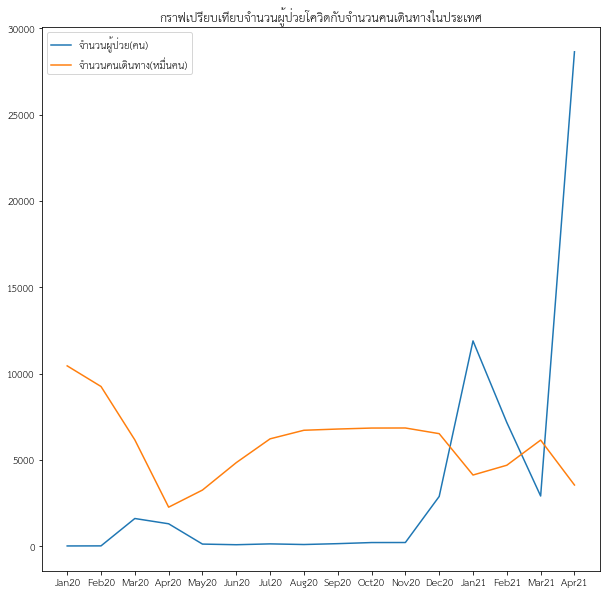

In [140]:
plt.plot(Graph['Month'],Graph["Patient Totals"],label = 'จำนวนผู้ป่วย(คน)')
plt.plot(Graph['Month'],Graph["Passenger Total"],label = 'จำนวนคนเดินทาง(หมื่นคน)')
plt.title('กราฟเปรียบเทียบจำนวนผู้ป่วยโควิดกับจำนวนคนเดินทางในประเทศ')
plt.legend();

สรุปได้ว่า เมื่อเปรียบเทียบจำนวนคนเดินทาง(หน่วย : หมื่นคน) กับ ผู้ป่วยโควิด (หน่วย : คน) จะเห็นได้ว่าจำนวนคนเดินทางในปี 2020 ถึง ปี 2021 มีจำนวนมากกว่าจำนวนผู้ป่วยหลายเท่า

#ข้อที่ 2 เปรียบเทียบวิธีการเดินทางของคนเป็นรายเดือนเทียบกับจำนวนผู้ป่วยในเดือนนั้นๆ

### ข้อมูลจำนวนผู้เดินทางแต่ละวิธีการเดินทาง

In [44]:
passenger

,Unnamed: 0,2020-01-01 00:00:00,2020-01-02 00:00:00,2020-01-03 00:00:00,2020-01-04 00:00:00,2020-01-05 00:00:00,2020-01-06 00:00:00,2020-01-07 00:00:00,2020-01-08 00:00:00,2020-01-09 00:00:00,2020-01-10 00:00:00,2020-01-11 00:00:00,2020-01-12 00:00:00,2020-01-13 00:00:00,2020-01-14 00:00:00,2020-01-15 00:00:00,2020-01-16 00:00:00,2020-01-17 00:00:00,2020-01-18 00:00:00,2020-01-19 00:00:00,2020-01-20 00:00:00,2020-01-21 00:00:00,2020-01-22 00:00:00,2020-01-23 00:00:00,2020-01-24 00:00:00,2020-01-25 00:00:00,2020-01-26 00:00:00,2020-01-27 00:00:00,2020-01-28 00:00:00,2020-01-29 00:00:00,2020-01-30 00:00:00,2020-01-31 00:00:00,2020-02-01 00:00:00,2020-02-02 00:00:00,2020-02-03 00:00:00,2020-02-04 00:00:00,2020-02-05 00:00:00,2020-02-06 00:00:00,2020-02-07 00:00:00,2020-02-08 00:00:00,...,2021-03-18 00:00:00,2021-03-19 00:00:00,2021-03-20 00:00:00,2021-03-21 00:00:00,2021-03-22 00:00:00,2021-03-23 00:00:00,2021-03-24 00:00:00,2021-03-25 00:00:00,2021-03-26 00:00:00,2021-03-27 00:00:00,2021-03-28 00:00:00,2021-03-29 00:00:00,2021-03-30 00:00:00,2021-03-31 00:00:00,2021-04-01 00:00:00,2021-04-02 00:00:00,2021-04-03 00:00:00,2021-04-04 00:00:00,2021-04-05 00:00:00,2021-04-06 00:00:00,2021-04-07 00:00:00,2021-04-08 00:00:00,2021-04-09 00:00:00,2021-04-10 00:00:00,2021-04-11 00:00:00,2021-04-12 00:00:00,2021-04-13 00:00:00,2021-04-14 00:00:00,2021-04-15 00:00:00,2021-04-16 00:00:00,2021-04-17 00:00:00,2021-04-18 00:00:00,2021-04-19 00:00:00,2021-04-20 00:00:00,2021-04-21 00:00:00,2021-04-22 00:00:00,2021-04-23 00:00:00,2021-04-24 00:00:00,2021-04-25 00:00:00,2021-04-26 00:00:00
0,ทางถนน (คน),1483255,1705026,1752572,1576146,1565134,1746239,1730243,1721777,1698594,1727356,1522765,1511236,1683606,1691301,1727613,1676901,1732040,1556750,1511356,1718946,1710079,1678182,1685422,1658692,1523835,1498975,1696898,1679988,1668462,1640721,1704546,1400174,1483074,1706497,1731697,1727513,1662866,1746742,1505635,...,997062,1017447,849673,787616,937505,969454,958065,981683,1011976,877911,794001,974571,965117,967022,987469,1006485,868194,789312,965421,753176,908431,936938,929038,719618,555680,578184,424539,454352,479063,596596,540688,507339,695769,665925,648848,631892,635830,516751,425707,580580
1,ทางราง (คน),885353,1269207,1366412,1027281,915425,1479971,1496915,1496873,1525899,1630428,1192917,988051,1479502,1491002,1502596,1507477,1599647,1169227,983700,1495196,1497279,1488097,1497174,1527329,1116084,938763,1420125,1457240,1440515,1464619,1597290,1097787,940562,1452349,1437693,1463069,1465400,1589959,1036116,...,984873,1033094,690769,544737,961659,986118,994193,1007277,1083825,730040,583999,1002307,1008957,1039196,1037660,1109747,726174,537800,986006,586488,932517,830224,792450,430863,303809,396526,235614,227986,245450,421863,303925,260010,520387,488979,475030,467490,474554,289943,223384,418835
2,ทางน้ำ (คน),272578,291990,301260,271171,254176,281785,275127,253550,263139,280283,243767,246025,276490,276916,253897,252473,281743,251052,227983,293441,278167,267105,266393,281291,257999,246371,269399,270801,253640,257520,264406,220866,231707,264747,259426,262889,257261,268799,234187,...,85762,126155,81959,86020,90290,109277,78491,88408,88934,85300,79325,107145,95217,91676,84888,81193,115793,106230,100081,83620,116425,105530,118869,163296,169357,167760,182536,166326,150923,108396,103610,73357,77813,69035,66006,60186,54870,48885,42733,53591
3,ทางอากาศ* (คน),102678,104613,100575,100852,100784,98456,98722,96142,98749,101348,93156,99755,99229,98052,98970,103727,106000,103356,105954,105424,100735,101432,104623,103697,101563,103158,103498,98451,95555,95849,97556,90402,89533,88154,85779,88266,93860,99445,94944,...,51244,65243,57665,64944,59144,51341,53670,59380,67960,63406,72844,66721,56866,57980,70353,77529,76062,80447,73958,77376,74769,79717,75900,69100,59960,51998,47717,48945,49859,44204,43157,45917,29483,25390,18141,16139,15365,13702,16622,13585
4,รวมประชาชนเดินทาง (คน),2743864,3370836,3520819,2975450,2835519,3606451,3601007,3568342,3586381,3739415,3052605,28450

In [48]:
passenger_Road = [passenger.iloc[:,1:32].sum(axis=1)[0]
            ,passenger.iloc[:,32:61].sum(axis=1)[0]
            ,passenger.iloc[:,61:92].sum(axis=1)[0]
            ,passenger.iloc[:,92:122].sum(axis=1)[0]
            ,passenger.iloc[:,122:153].sum(axis=1)[0]
            ,passenger.iloc[:,153:183].sum(axis=1)[0]
            ,passenger.iloc[:,183:214].sum(axis=1)[0]
            ,passenger.iloc[:,214:245].sum(axis=1)[0]
            ,passenger.iloc[:,245:275].sum(axis=1)[0]
            ,passenger.iloc[:,275:306].sum(axis=1)[0]
            ,passenger.iloc[:,306:336].sum(axis=1)[0]
            ,passenger.iloc[:,336:367].sum(axis=1)[0]
            ,passenger.iloc[:,367:398].sum(axis=1)[0]
            ,passenger.iloc[:,398:426].sum(axis=1)[0]
            ,passenger.iloc[:,426:457].sum(axis=1)[0]
            ,passenger.iloc[:,457:].sum(axis=1)[0]]
passenger_Road

[51184656,
 46429218,
 32946721,
 14071816,
 19371815,
 25723627,
 31550369,
 33311862,
 32661894,
 33084230,
 32234047,
 31315704,
 22617288,
 24150796,
 29315758,
 17801825]

In [50]:
passenger_Rail = [passenger.iloc[:,1:32].sum(axis=1)[1]
            ,passenger.iloc[:,32:61].sum(axis=1)[1]
            ,passenger.iloc[:,61:92].sum(axis=1)[1]
            ,passenger.iloc[:,92:122].sum(axis=1)[1]
            ,passenger.iloc[:,122:153].sum(axis=1)[1]
            ,passenger.iloc[:,153:183].sum(axis=1)[1]
            ,passenger.iloc[:,183:214].sum(axis=1)[1]
            ,passenger.iloc[:,214:245].sum(axis=1)[1]
            ,passenger.iloc[:,245:275].sum(axis=1)[1]
            ,passenger.iloc[:,275:306].sum(axis=1)[1]
            ,passenger.iloc[:,306:336].sum(axis=1)[1]
            ,passenger.iloc[:,336:367].sum(axis=1)[1]
            ,passenger.iloc[:,367:398].sum(axis=1)[1]
            ,passenger.iloc[:,398:426].sum(axis=1)[1]
            ,passenger.iloc[:,426:457].sum(axis=1)[1]
            ,passenger.iloc[:,457:].sum(axis=1)[1]]
passenger_Rail

[41947594,
 36460619,
 24466973,
 7368716,
 11482880,
 19881012,
 25890919,
 29055512,
 30044159,
 30259559,
 30409897,
 27947720,
 15761904,
 19785716,
 27852295,
 13723714]

In [52]:
passenger_water = [passenger.iloc[:,1:32].sum(axis=1)[2]
            ,passenger.iloc[:,32:61].sum(axis=1)[2]
            ,passenger.iloc[:,61:92].sum(axis=1)[2]
            ,passenger.iloc[:,92:122].sum(axis=1)[2]
            ,passenger.iloc[:,122:153].sum(axis=1)[2]
            ,passenger.iloc[:,153:183].sum(axis=1)[2]
            ,passenger.iloc[:,183:214].sum(axis=1)[2]
            ,passenger.iloc[:,214:245].sum(axis=1)[2]
            ,passenger.iloc[:,245:275].sum(axis=1)[2]
            ,passenger.iloc[:,275:306].sum(axis=1)[2]
            ,passenger.iloc[:,306:336].sum(axis=1)[2]
            ,passenger.iloc[:,336:367].sum(axis=1)[2]
            ,passenger.iloc[:,367:398].sum(axis=1)[2]
            ,passenger.iloc[:,398:426].sum(axis=1)[2]
            ,passenger.iloc[:,426:457].sum(axis=1)[2]
            ,passenger.iloc[:,457:].sum(axis=1)[2]]
passenger_water

[8261938,
 6998927,
 2526613,
 1155419,
 1503935,
 2241446,
 3481589,
 3176923,
 3344351,
 3012379,
 3402311,
 3690246,
 2258165,
 2152160,
 2672364,
 2671309]

In [53]:
passenger_Air = [passenger.iloc[:,1:32].sum(axis=1)[3]
            ,passenger.iloc[:,32:61].sum(axis=1)[3]
            ,passenger.iloc[:,61:92].sum(axis=1)[3]
            ,passenger.iloc[:,92:122].sum(axis=1)[3]
            ,passenger.iloc[:,122:153].sum(axis=1)[3]
            ,passenger.iloc[:,153:183].sum(axis=1)[3]
            ,passenger.iloc[:,183:214].sum(axis=1)[3]
            ,passenger.iloc[:,214:245].sum(axis=1)[3]
            ,passenger.iloc[:,245:275].sum(axis=1)[3]
            ,passenger.iloc[:,275:306].sum(axis=1)[3]
            ,passenger.iloc[:,306:336].sum(axis=1)[3]
            ,passenger.iloc[:,336:367].sum(axis=1)[3]
            ,passenger.iloc[:,367:398].sum(axis=1)[3]
            ,passenger.iloc[:,398:426].sum(axis=1)[3]
            ,passenger.iloc[:,426:457].sum(axis=1)[3]
            ,passenger.iloc[:,457:].sum(axis=1)[3]]
passenger_Air

[3122659,
 2675542,
 1695583,
 57439,
 211125,
 618881,
 1318559,
 1664163,
 1866183,
 2131684,
 2481744,
 2288545,
 640365,
 862145,
 1674095,
 1295395]

#### เปรียบเทียบโดยใช้ตาราง

In [123]:
df = pd.DataFrame(Patient_totals,columns=['Patient Totals'])
df['Pssenger Road'] =passenger_Road
df['Pssenger Rail'] =passenger_Rail
df['Pssenger water'] =passenger_water
df['Pssenger Air'] =passenger_Air
df.insert(0, "Month", ['Jan2020','Feb2020','Mar2020','Apr2020','May2020','Jun2020','Jul2020','Aug2020','Sep2020','Oct2020','Nov2020','Dec2020','Jan2021','Feb2021','Mar2021','Apr2021'], True)
df

,Month,Patient Totals,Pssenger Road,Pssenger Rail,Pssenger water,Pssenger Air
0,Jan2020,19,51184656,41947594,8261938,3122659
1,Feb2020,23,46429218,36460619,6998927,2675542
2,Mar2020,1609,32946721,24466973,2526613,1695583
3,Apr2020,1303,14071816,7368716,1155419,57439
4,May2020,127,19371815,11482880,1503935,211125
5,Jun2020,90,25723627,19881012,2241446,618881
6,Jul2020,139,31550369,25890919,3481589,1318559
7,Aug2020,102,33311862,29055512,3176923,1664163
8,Sep2020,152,32661894,30044159,3344351,1866183
9,Oct2020,216,33084230,30259559,3012379,2131684


#### เปรียบเทียบโดยใช้กราฟ

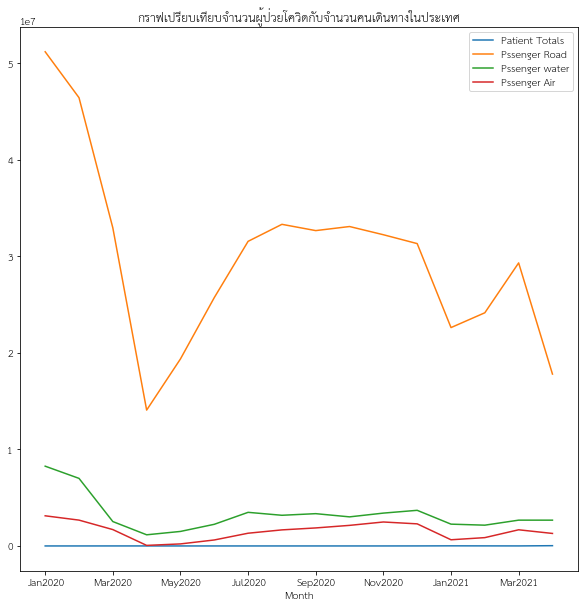

In [133]:
import matplotlib.pyplot as plt
df.plot(x="Month", y=["Patient Totals", "Pssenger Road",'Pssenger water',"Pssenger Air"])
plt.title('กราฟเปรียบเทียบจำนวนผู้ป่วยโควิดกับจำนวนคนเดินทางในประเทศ')
plt.show()